In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
os.chdir('C:/Users/farav/OneDrive/Documentos/Python Scripts')

In [5]:
base_gral_senti_fecha = pd.read_csv('base_tit_senti_fecha.csv', encoding='iso8859_2')
base_gral_senti_fecha.head()

,titular,fecha,diario,sentimiento
0,"""Mirá la ceremonia de inauguración de los Jueg...",2021-07-23,elobse,NEU
1,"""El contrasentido del clásico: Peńarol perdió ...",2021-07-23,elobse,NEU
2,"""Los sueldos de $ 200.000 en el Directorio de ...",2021-07-23,elobse,NEU
3,"""żDónde se podrán ver los Juegos Olímpicos de ...",2021-07-23,elobse,NEU
4,"""Crece interés de argentinos por Montevideo: c...",2021-07-23,elobse,POS


In [6]:
base_sent_elobse = base_gral_senti_fecha[base_gral_senti_fecha['diario'] == 'elobse']
base_sent_elobse.head(10)

,titular,fecha,diario,sentimiento
0,"""Mirá la ceremonia de inauguración de los Jueg...",2021-07-23,elobse,NEU
1,"""El contrasentido del clásico: Peńarol perdió ...",2021-07-23,elobse,NEU
2,"""Los sueldos de $ 200.000 en el Directorio de ...",2021-07-23,elobse,NEU
3,"""żDónde se podrán ver los Juegos Olímpicos de ...",2021-07-23,elobse,NEU
4,"""Crece interés de argentinos por Montevideo: c...",2021-07-23,elobse,POS
5,"""Delgado y Orsi, la tensión entre dos referent...",2021-07-23,elobse,NEU
6,"""El antiguo PES será gratuito: żhay chances de...",2021-07-23,elobse,NEU
7,"""El correctivo salarial que se debe pagar a tr...",2021-07-23,elobse,NEU
8,"""\""Obras que no se harán\"", \""sorpresa\"" y \""f...",2021-07-23,elobse,NEG
9,"""El dilema de los patrocinadores japoneses ant...",2021-07-23,elobse,NEG


In [7]:
!python -m pip install nltk

In [ ]:
!python -m nltk.downloader all

In [9]:
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output

In [10]:
data_elobse = base_sent_elobse['titular']
data_elobse.head()

0    "Mirá la ceremonia de inauguración de los Jueg...
1    "El contrasentido del clásico: Peńarol perdió ...
2    "Los sueldos de $ 200.000 en el Directorio de ...
3    "żDónde se podrán ver los Juegos Olímpicos de ...
4    "Crece interés de argentinos por Montevideo: c...
Name: titular, dtype: object

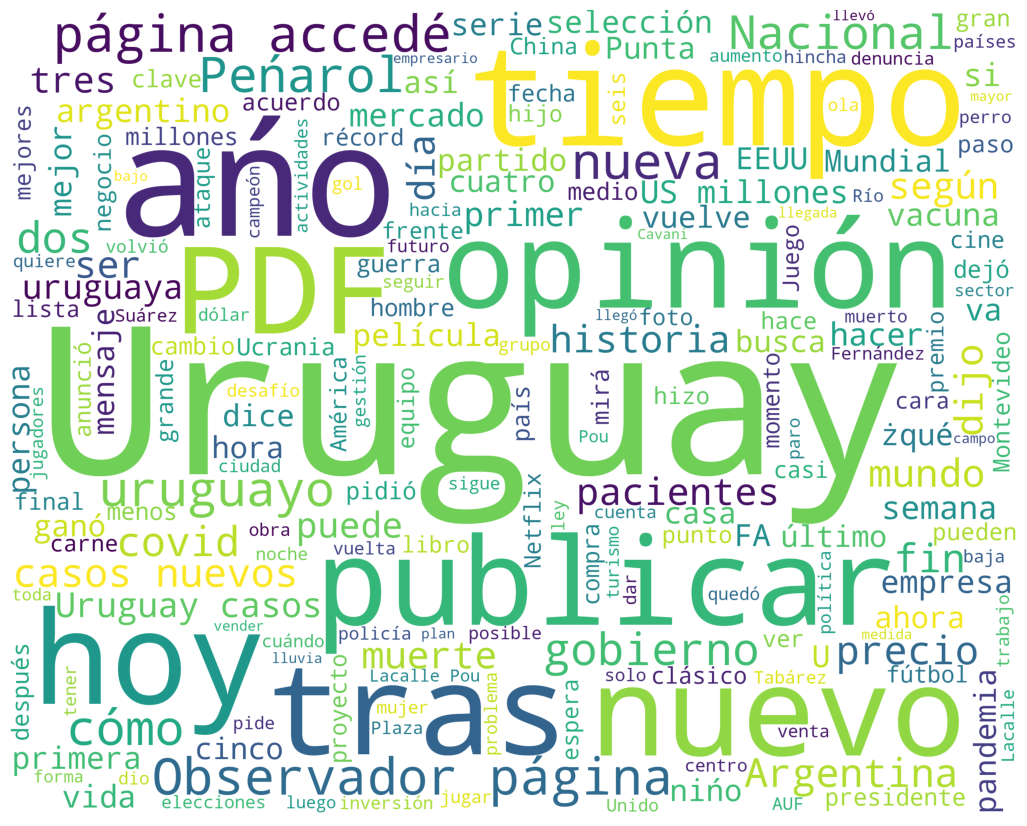

In [11]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    ''' Limpio el texto eliminando hashtags, menciones, links y retweets.
    '''
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('¿')
                                and not word.startswith('¡')
                                and not word.startswith('"')
                                and not word.endswith('?')
                                and not word.endswith('!')
                                and not word.endswith('"')
                                and word != '$'
                            ])
    wordcloud = WordCloud(stopwords=stopwords.words("spanish"),
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
#print("Palabras positivas")
wordcloud_draw(data_elobse,'white')
#print("Palabras negativas")
#wordcloud_draw(train_neg)

In [13]:
data_sent_elobse = base_sent_elobse[['titular', 'sentimiento']]

data_sent_elobse_pos = base_sent_elobse[base_sent_elobse['sentimiento'] == 'POS']
data_sent_elobse_pos = base_sent_elobse['titular']
data_sent_elobse_neg = base_sent_elobse[base_sent_elobse['sentimiento'] == 'NEG']
data_sent_elobse_neg = base_sent_elobse['titular']
data_sent_elobse_neu = base_sent_elobse[base_sent_elobse['sentimiento'] == 'NEU']
data_sent_elobse_neu = base_sent_elobse['titular']

Palabras positivas


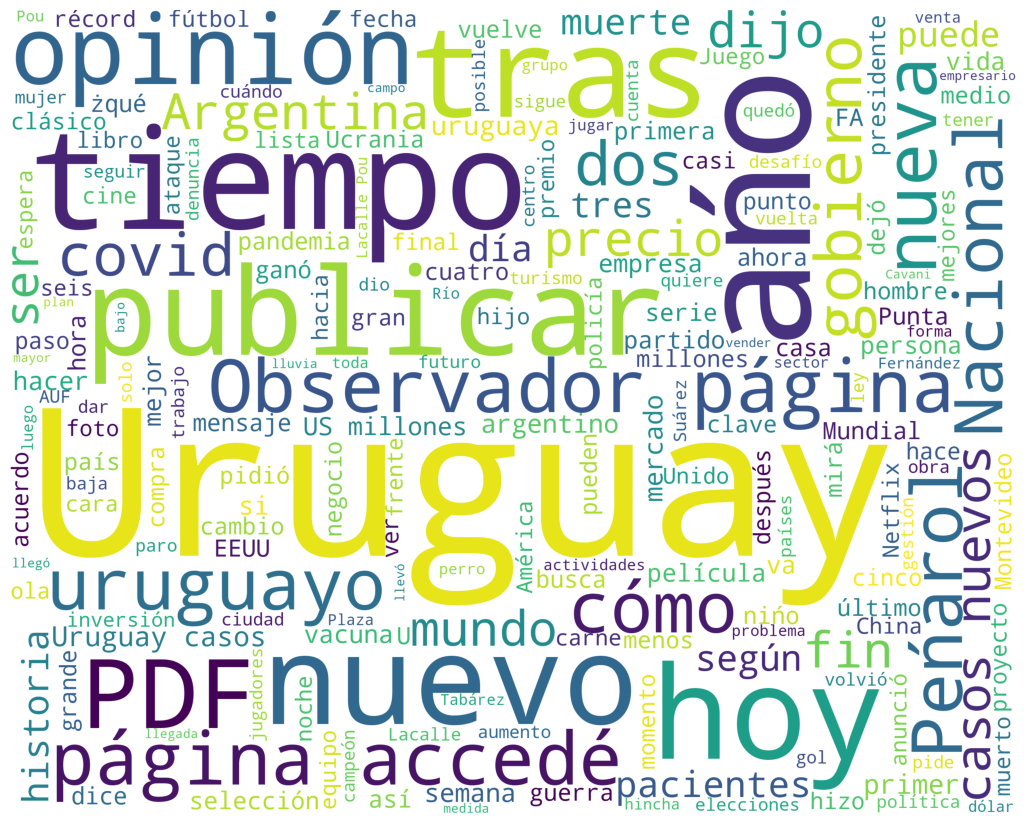

Palabras negativas


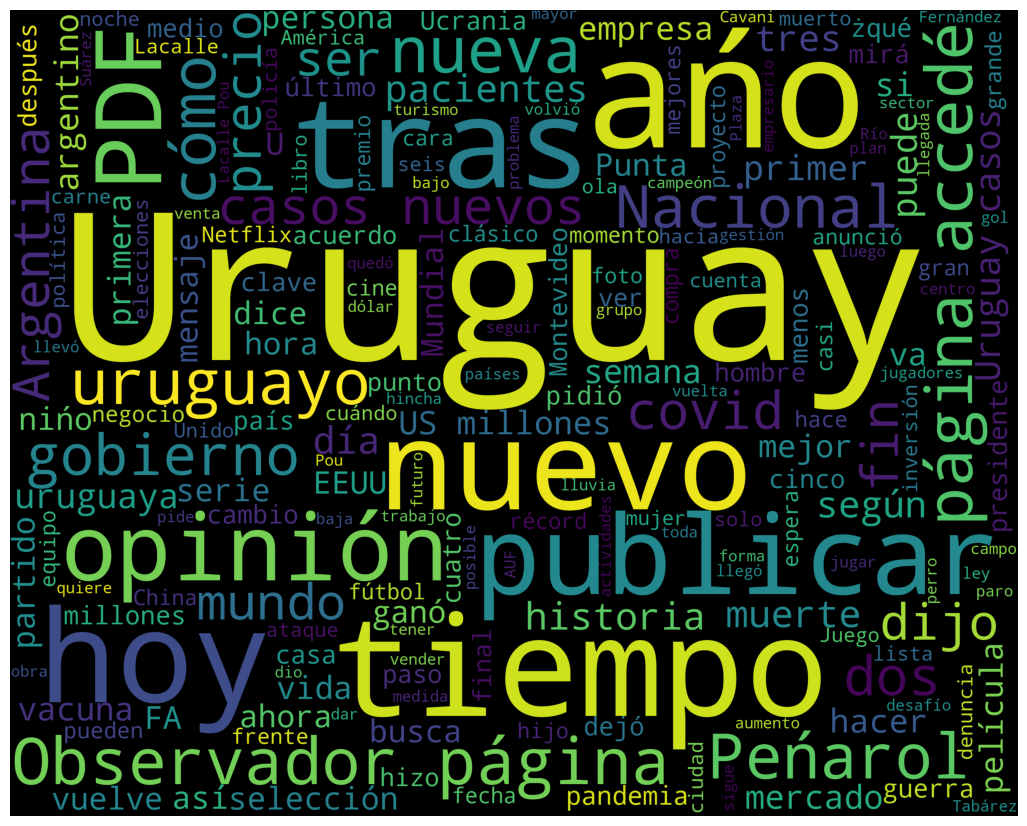

Palabras neutras black


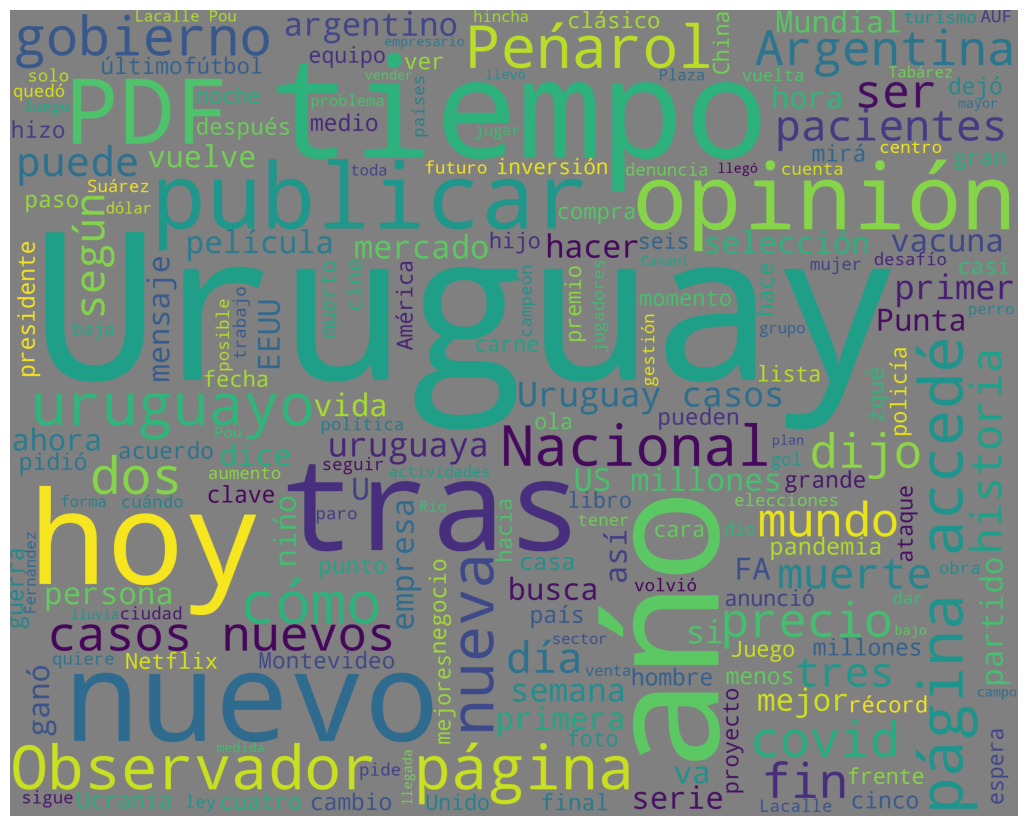

In [14]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    ''' Limpio el texto eliminando hashtags, menciones, links y retweets.
    '''
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('¿')
                                and not word.startswith('¡')
                                and not word.startswith('"')
                                and not word.endswith('?')
                                and not word.endswith('!')
                                and not word.endswith('"')
                                and word != '$'
                            ])
    wordcloud = WordCloud(stopwords=stopwords.words("spanish"),
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Palabras positivas")
wordcloud_draw(data_sent_elobse_pos,'white')
print("Palabras negativas")
wordcloud_draw(data_sent_elobse_neg)
print('Palabras neutras', 'black')
wordcloud_draw(data_sent_elobse_neu, 'grey')